In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score , confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
folder_path = 'F:/PROJECT/Augmentation'

In [5]:
images = []
labels = []

for label in os.listdir(folder_path):
    label_folder = os.path.join(folder_path, label)
    if os.path.isdir(label_folder):
        for filename in os.listdir(label_folder):
            if filename.endswith('.jpeg') or filename.endswith('.png'):
                img_path = os.path.join(label_folder, filename)
                img = Image.open(img_path).convert('L')  # تحويل الصورة إلى تدرج الرمادي
                img = img.resize((128, 128))  # تغيير الحجم
                images.append(np.array(img).flatten())  # تحويل الصورة إلى مصفوفة
                labels.append(label)

In [7]:
X = np.array(images)
y = np.array(labels)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = SVC(kernel='linear')  # يمكنك تجربة kernels أخرى
model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # أو 'macro'
recall = recall_score(y_test, y_pred, average='weighted')  # أو 'macro'
f_measure = f1_score(y_test, y_pred, average='weighted')  # أو 'macro'
conf_matrix = confusion_matrix(y_test, y_pred)

In [17]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-measure: {f_measure:.2f}')

Accuracy: 96.07%
Precision: 0.96
Recall: 0.96
F-measure: 0.96


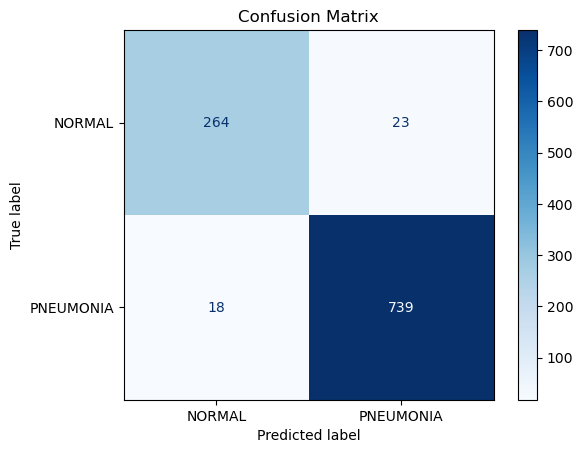

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()